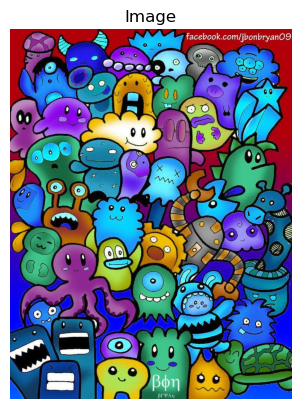

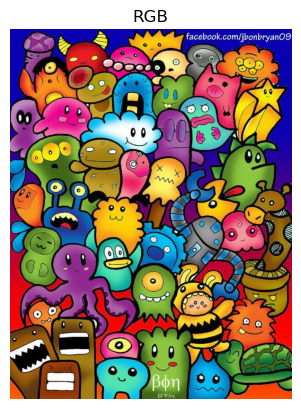

In [5]:
import cv2 as c 
import matplotlib.pyplot as plt
import numpy as np
img=c.imread("color.jpg")
plt.title('Image')
plt.axis('off')
plt.imshow(img)
plt.show()
img_rgb=c.cvtColor(img,c.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('RGB')
plt.axis("off")
plt.show()

In [6]:
h,w,ch=img_rgb.shape
print(f'Heigth:{h},Width:{w},Channels:{ch}')

Heigth:1024,Width:780,Channels:3


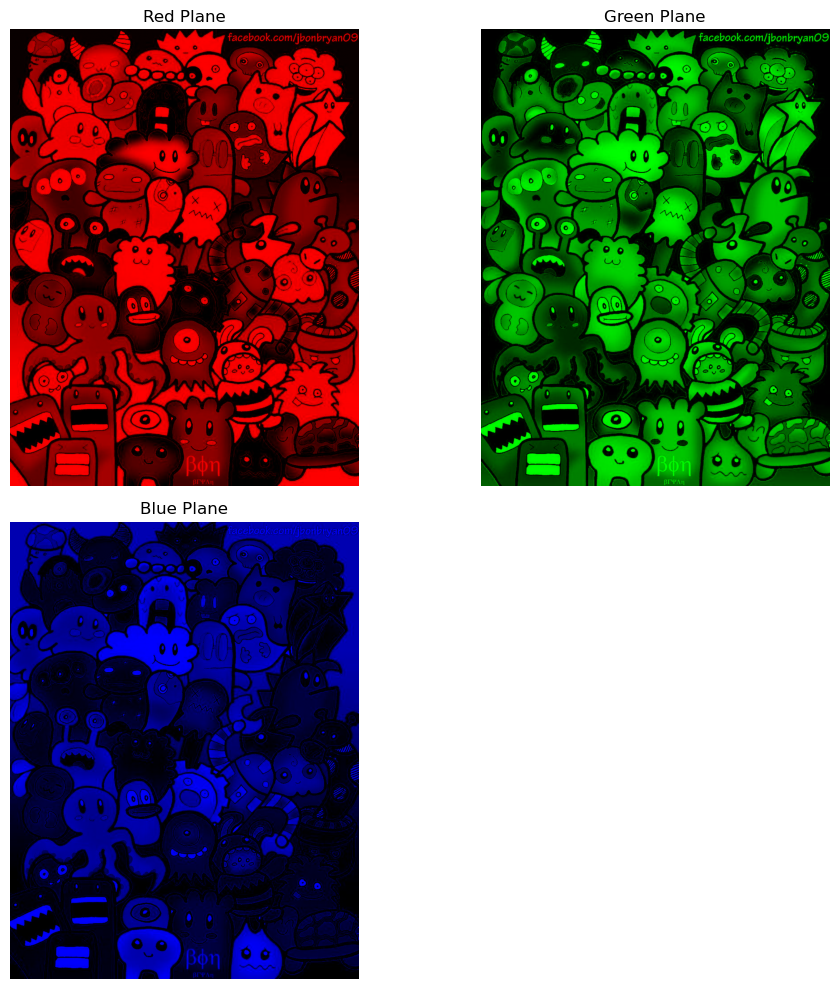

In [7]:
plt.figure(figsize=(10,10))
img_red=np.zeros_like(img_rgb,dtype=float)
img_red[:,:,0]=img_rgb[:,:,0]
img_red/=255
plt.subplot(2,2,1)
plt.title("Red Plane")
plt.axis('off')
plt.imshow(img_red)

img_green=np.zeros_like(img_rgb,dtype=float)
img_green[:,:,1]=img_rgb[:,:,1]
img_green/=255
plt.subplot(2,2,2)
plt.title("Green Plane")
plt.axis('off')
plt.imshow(img_green)

img_blue=np.zeros_like(img_rgb,dtype=float)
img_blue[:,:,2]=img_rgb[:,:,2]
img_blue/=255
plt.subplot(2,2,3)
plt.axis('off')
plt.title("Blue Plane")
plt.imshow(img_blue)

plt.tight_layout()

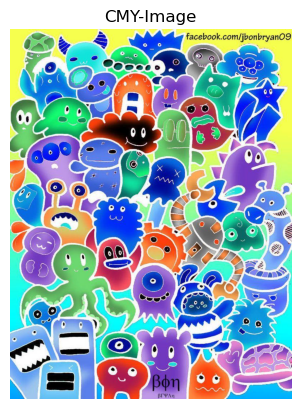

In [8]:
img_cmy=np.zeros_like(img_rgb,dtype=float)
img_cmy[:,:,0]=1-(img_rgb[:,:,0]/255.0)
img_cmy[:,:,1]=1-(img_rgb[:,:,1]/255.0)
img_cmy[:,:,2]=1-(img_rgb[:,:,2]/255.0)
img_cmy=(img_cmy*255).astype(np.uint8)
plt.imshow(img_cmy)
plt.axis('off')
plt.title('CMY-Image')
plt.show()

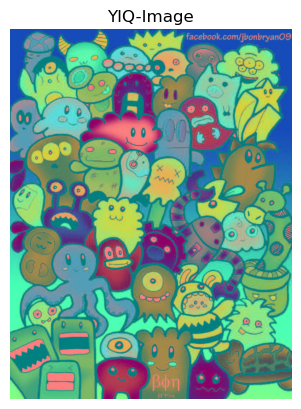

In [9]:
img_yiq=np.zeros_like(img_rgb,dtype=float)
img_yiq[:,:,0]=(img_rgb[:,:,0]*0.299+img_rgb[:,:,1]*0.587+img_rgb[:,:,2]*0.114)
img_yiq[:,:,1]=(img_rgb[:,:,0]*0.596-img_rgb[:,:,1]*0.274-img_rgb[:,:,2]*0.322)
img_yiq[:,:,2]=(img_rgb[:,:,0]*0.211-img_rgb[:,:,1]*0.523+img_rgb[:,:,2]*0.312)
img_yiq[:,:,0]=np.clip(img_yiq[:,:,0],0,255)
img_yiq[:,:,1]=np.clip(img_yiq[:,:,1]+128,0,255)
img_yiq[:,:,2]=np.clip(img_yiq[:,:,2]+128,0,255)
img_yiq=img_yiq.astype(np.uint8)
plt.imshow(img_yiq)
plt.axis('off')
plt.title('YIQ-Image')
plt.show()

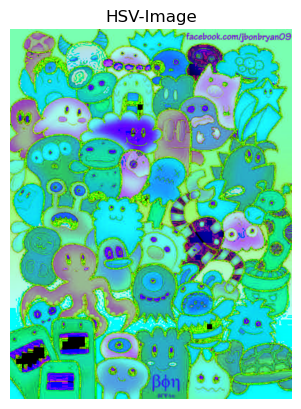

In [10]:
img_hsv=c.cvtColor(img_rgb,c.COLOR_RGB2HSV)
plt.imshow(img_hsv)
plt.axis('off')
plt.title('HSV-Image')
plt.show()

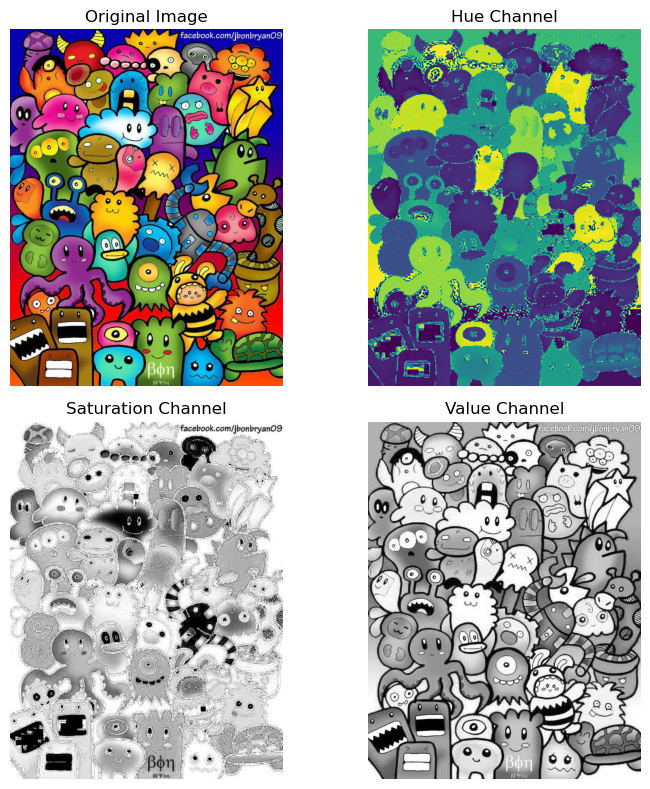

In [11]:
h, s, v = c.split(img_hsv)

plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(h)
plt.title('Hue Channel')
plt.axis('off') 

plt.subplot(2, 2, 3)
plt.imshow(s, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(v, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

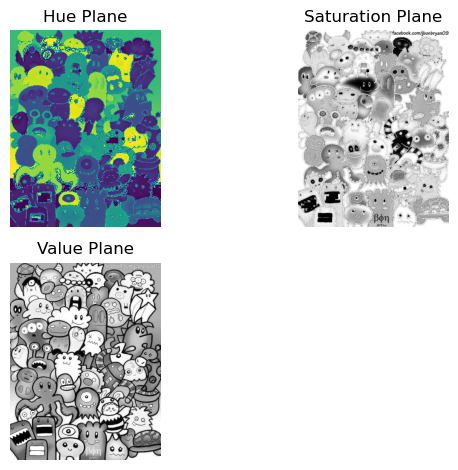

In [12]:
img_hue=img_hsv[:,:,0].astype(float)
img_hue/=179
img_sat=img_hsv[:,:,1].astype(float)
img_value=img_hsv[:,:,2].astype(float)
plt.subplot(2,2,1)
plt.imshow(img_hue)
plt.title("Hue Plane")
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(img_sat,cmap='gray')
plt.title("Saturation Plane")
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(img_value,cmap='gray')
plt.title("Value Plane")
plt.axis('off')

plt.tight_layout()

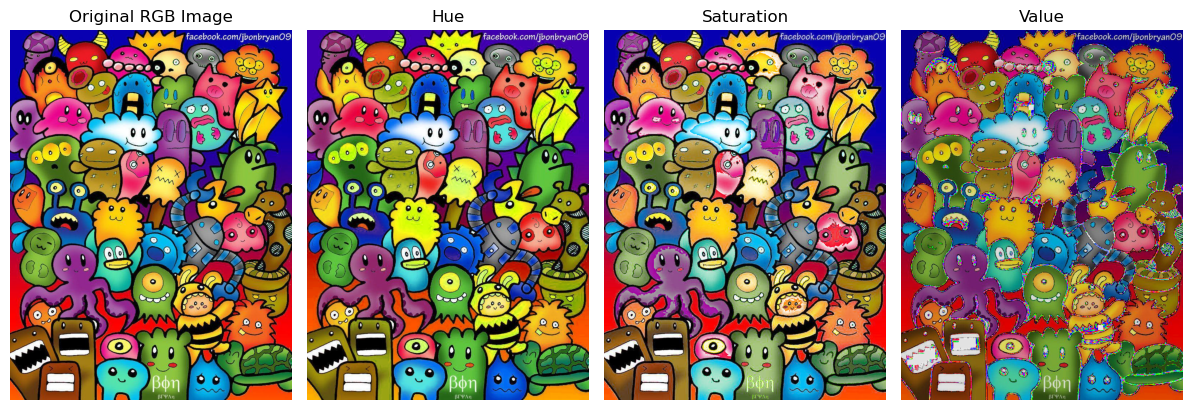

In [32]:
H1 = (h + 10) % 180
modified_hsv1 = c.merge([H1, s, v])
modified_rgb1= c.cvtColor(modified_hsv1, c.COLOR_HSV2RGB)

S1= np.clip(s*2, 0, 255)
modified_hsv2 = c.merge([h, S1, v])
modified_rgb2= c.cvtColor(modified_hsv2, c.COLOR_HSV2RGB)

V3 =np.clip( v- 30, 0, 255)
modified_hsv3 = c.merge([h, s, V3])
modified_rgb3 = c.cvtColor(modified_hsv3, c.COLOR_HSV2RGB)

plt.figure(figsize=(15, 6))

plt.subplot(1, 5, 1)
plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(modified_rgb1)
plt.title("Hue")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(modified_rgb2)
plt.title("Saturation")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(modified_rgb3)
plt.title("Value")
plt.axis("off")
plt.tight_layout()
plt.show()

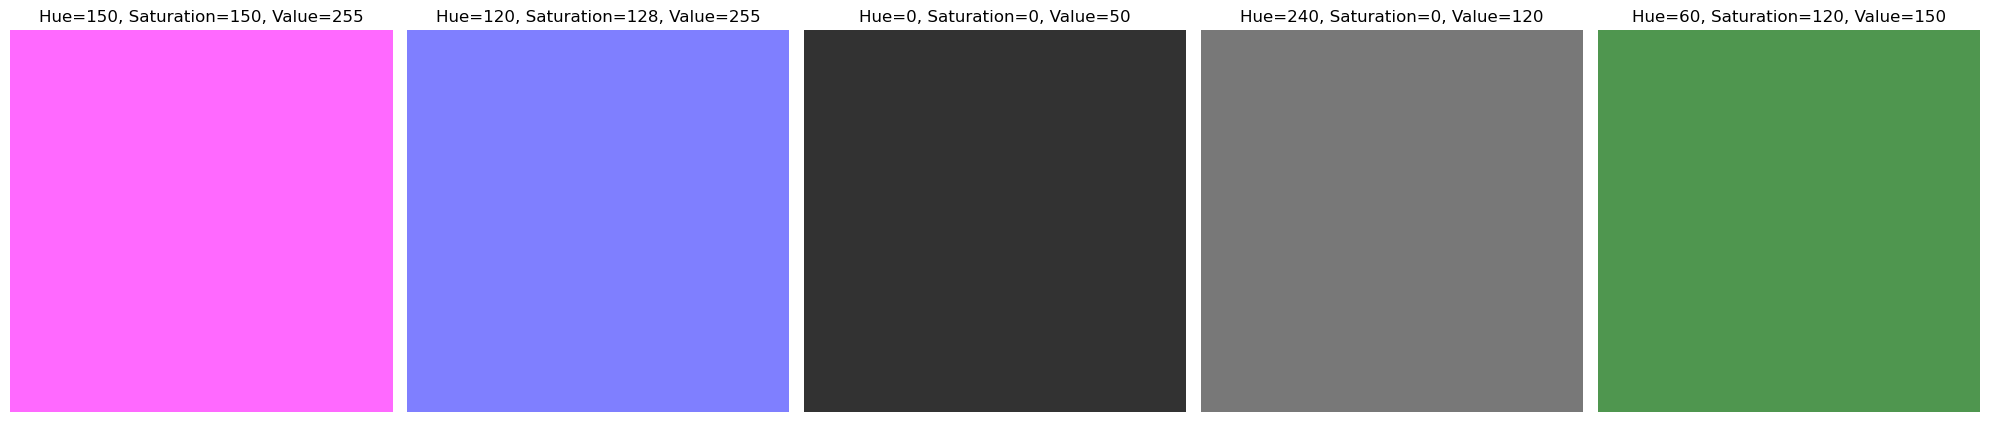

In [70]:
height, width = 25, 25
image_hsv = np.zeros((height, width, 3), dtype=np.uint8)
hsv_values = [
    [150, 150, 255],   
    [120, 128, 255],  
    [0, 0, 50],     
    [240, 0, 120],
    [60, 120, 150]
]
plt.figure(figsize=(20, 10))
for idx, (hue, saturation, value) in enumerate(hsv_values):
    image_hsv[:, :, 0] = hue
    image_hsv[:, :, 1] = saturation
    image_hsv[:, :, 2] = value
    image_rgb = c.cvtColor(image_hsv, c.COLOR_HSV2RGB)
    plt.subplot(1, len(hsv_values), idx + 1)
    plt.imshow(image_rgb)
    plt.title(f"Hue={hue}, Saturation={saturation}, Value={value}")
    plt.axis('off')
plt.tight_layout()
plt.show()


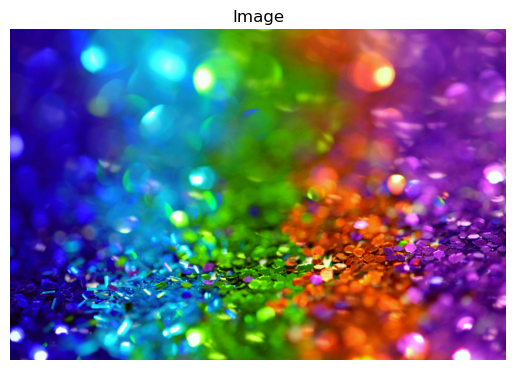

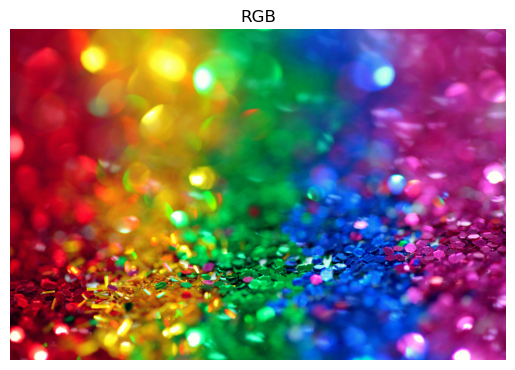

In [50]:
import cv2 as c 
import matplotlib.pyplot as plt
import numpy as np
img=c.imread("multi-color-4.jpg")
plt.title('Image')
plt.axis('off')
plt.imshow(img)
plt.show()
img_rgb=c.cvtColor(img,c.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('RGB')
plt.axis("off")
plt.show()

In [52]:
h,w,ch=img_rgb.shape
print(f'Heigth:{h},Width:{w},Channels:{ch}')

Heigth:3744,Width:5616,Channels:3


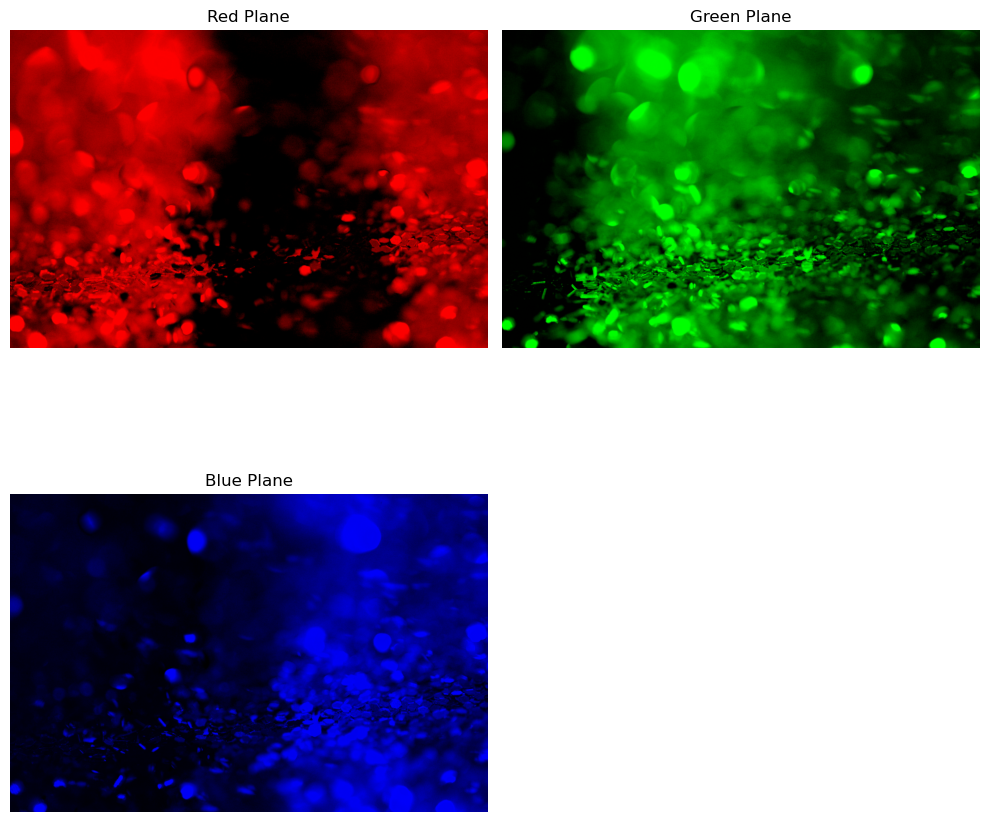

In [54]:
plt.figure(figsize=(10,10))
img_red=np.zeros_like(img_rgb,dtype=float)
img_red[:,:,0]=img_rgb[:,:,0]
img_red/=255
plt.subplot(2,2,1)
plt.title("Red Plane")
plt.axis('off')
plt.imshow(img_red)

img_green=np.zeros_like(img_rgb,dtype=float)
img_green[:,:,1]=img_rgb[:,:,1]
img_green/=255
plt.subplot(2,2,2)
plt.title("Green Plane")
plt.axis('off')
plt.imshow(img_green)

img_blue=np.zeros_like(img_rgb,dtype=float)
img_blue[:,:,2]=img_rgb[:,:,2]
img_blue/=255
plt.subplot(2,2,3)
plt.axis('off')
plt.title("Blue Plane")
plt.imshow(img_blue)

plt.tight_layout()

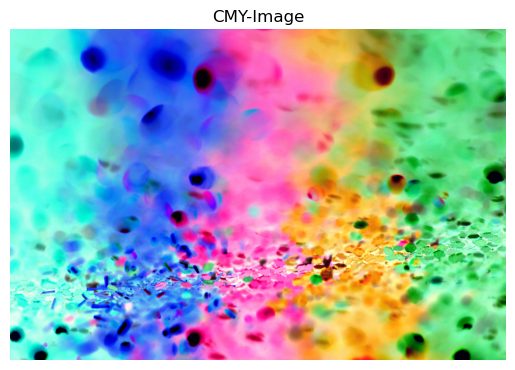

In [56]:
img_cmy=np.zeros_like(img_rgb,dtype=float)
img_cmy[:,:,0]=1-(img_rgb[:,:,0]/255.0)
img_cmy[:,:,1]=1-(img_rgb[:,:,1]/255.0)
img_cmy[:,:,2]=1-(img_rgb[:,:,2]/255.0)
img_cmy=(img_cmy*255).astype(np.uint8)
plt.imshow(img_cmy)
plt.axis('off')
plt.title('CMY-Image')
plt.show()

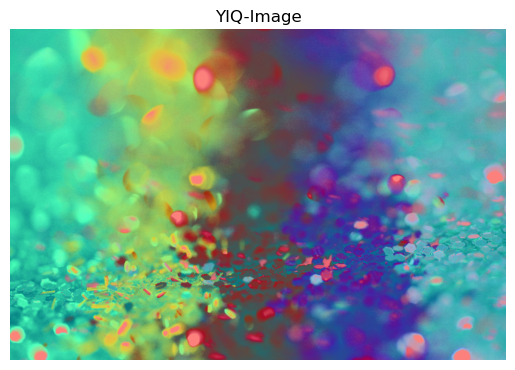

In [58]:
img_yiq=np.zeros_like(img_rgb,dtype=float)
img_yiq[:,:,0]=(img_rgb[:,:,0]*0.299+img_rgb[:,:,1]*0.587+img_rgb[:,:,2]*0.114)
img_yiq[:,:,1]=(img_rgb[:,:,0]*0.596-img_rgb[:,:,1]*0.274-img_rgb[:,:,2]*0.322)
img_yiq[:,:,2]=(img_rgb[:,:,0]*0.211-img_rgb[:,:,1]*0.523+img_rgb[:,:,2]*0.312)
img_yiq[:,:,0]=np.clip(img_yiq[:,:,0],0,255)
img_yiq[:,:,1]=np.clip(img_yiq[:,:,1]+128,0,255)
img_yiq[:,:,2]=np.clip(img_yiq[:,:,2]+128,0,255)
img_yiq=img_yiq.astype(np.uint8)
plt.imshow(img_yiq)
plt.axis('off')
plt.title('YIQ-Image')
plt.show()

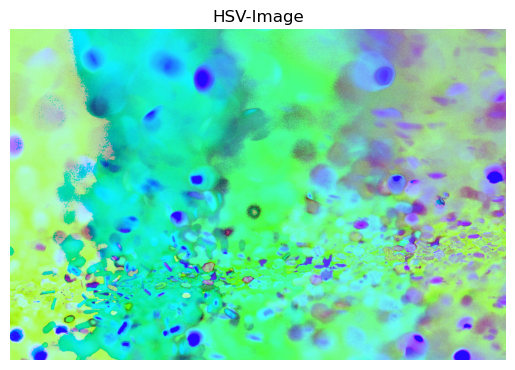

In [60]:
img_hsv=c.cvtColor(img_rgb,c.COLOR_RGB2HSV)
plt.imshow(img_hsv)
plt.axis('off')
plt.title('HSV-Image')
plt.show()

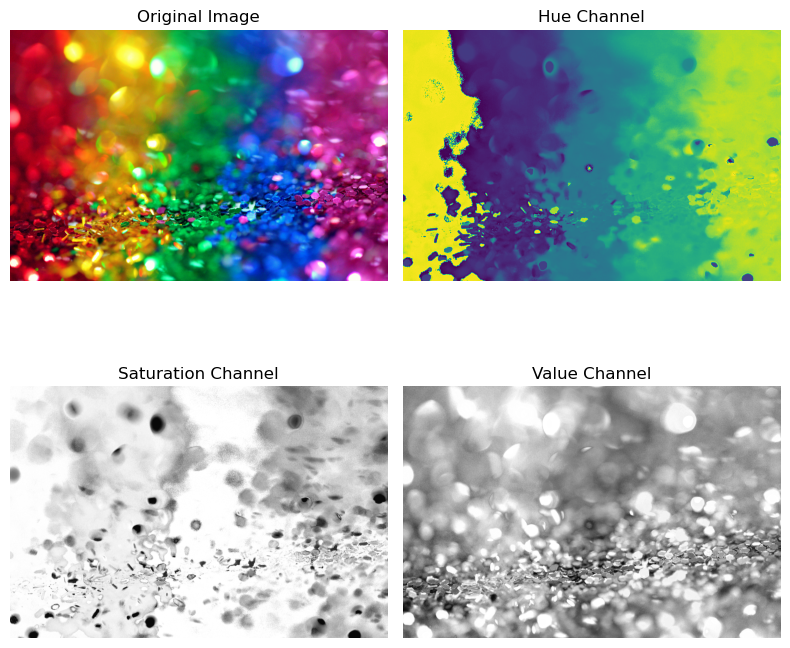

In [62]:
h, s, v = c.split(img_hsv)

plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(h)
plt.title('Hue Channel')
plt.axis('off') 

plt.subplot(2, 2, 3)
plt.imshow(s, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(v, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

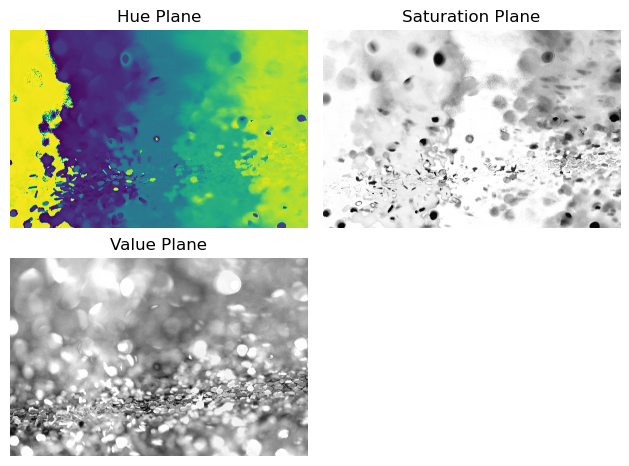

In [64]:
img_hue=img_hsv[:,:,0].astype(float)
img_hue/=179
img_sat=img_hsv[:,:,1].astype(float)
img_value=img_hsv[:,:,2].astype(float)
plt.subplot(2,2,1)
plt.imshow(img_hue)
plt.title("Hue Plane")
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(img_sat,cmap='gray')
plt.title("Saturation Plane")
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(img_value,cmap='gray')
plt.title("Value Plane")
plt.axis('off')

plt.tight_layout()

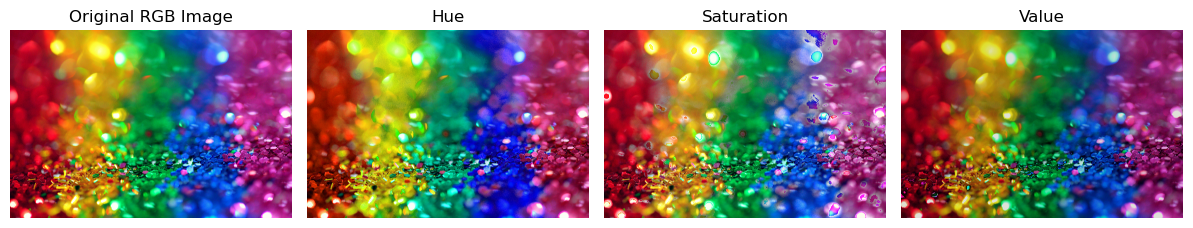

In [66]:
H1 = (h + 10) % 180
modified_hsv1 = c.merge([H1, s, v])
modified_rgb1= c.cvtColor(modified_hsv1, c.COLOR_HSV2RGB)

S1= np.clip(s*2, 0, 255)
modified_hsv2 = c.merge([h, S1, v])
modified_rgb2= c.cvtColor(modified_hsv2, c.COLOR_HSV2RGB)

V3 =np.clip( v- 30, 0, 255)
modified_hsv3 = c.merge([h, s, V3])
modified_rgb3 = c.cvtColor(modified_hsv3, c.COLOR_HSV2RGB)

plt.figure(figsize=(15, 6))

plt.subplot(1, 5, 1)
plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(modified_rgb1)
plt.title("Hue")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(modified_rgb2)
plt.title("Saturation")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(modified_rgb3)
plt.title("Value")
plt.axis("off")
plt.tight_layout()
plt.show()